# RNN (Recurrent Neural Network) 循环神经网络

## 1. Introduction 什么是RNN

RNN is a special type of neural network with recurrent connections between neurons. These recurrent connections enable RNN to process sequence data, such as time series data, natural language text, etc. Each neuron in RNN has an internal state, which can be used to store past information. The internal state of RNN will be updated based on the input data and the current state, so that RNN can process the current input based on past information.

RNN是一种特殊的神经网络，它的神经元之间存在循环连接。这种循环连接使得RNN可以处理序列数据，比如时间序列数据、自然语言文本等。RNN的每个神经元都有一个内部状态，这个内部状态可以用来存储过去的信息。RNN的内部状态会根据输入数据和当前状态进行更新，这样RNN就可以根据过去的信息来处理当前的输入。

## 2. Sequencing Representation 序列表示

Sequencing representation is to transform sequence data into a form that can be processed by a neural network. For time series data, the simplest way to represent the sequence is to use the time series data as the input of the neural network. For natural language text, the sequence can be represented as the embedding of the text.

序列表示方法是将序列数据转换为神经网络可以处理的形式。对于时间序列数据，最简单的序列表示方法是直接将时间序列数据作为神经网络的输入。对于自然语言文本，可以使用embedding编码的方式将文本转换为神经网络的输入。

RNN is used to process sequence data, and it uses the mechanism of weight sharing (i.e., an RNN network is used multiple times). 

RNN适用了处理序列性的数据，并利用权重共享机制（即一个RNN网络使用多次）。

For example, we want to predict whether it will rain on a certain day. We collect a large amount of meteorological information for many days, including temperature, air pressure, and rainfall. We divide the four days into one group, the first three days (represented by x1, x2, x3) are a sequence, and the fourth day is the known result. 

比如我们想要预知某一天是否会下雨，我们采集了大量天数的气象信息，气象信息包括温度、气压和降雨，我们分四天为一组，前三天（用x1,x2,x3表示）就是一个序列，第四天作为已知结果，

By comparing the known result of the fourth day with the estimated value of the model, we can calculate the loss and gradient to optimize the model parameters. The significance of using a sequential model is that there is a certain relationship or influence between the front and back of the data, that is, the data of x2 depends on x1, the data of x3 depends on x2, and the data of x4 depends on x3. That is, the meteorological information of the first three days has a certain impact on the fourth day (the weather changes are relatively gentle, and there are rarely cliff-like changes, so the weather of the previous days can be used to predict the weather of the next day). 

通过第四天的已知结果与模型的估计值进行比较求损失、求梯度来优化模型参数。使用序列模型的意义在于数据前后之间有一定的联系或影响，即x2的数据依赖于x1,x3的数据依赖于x2，x4的数据依赖于x3，即前三天气象信息与是否降雨对第四天有一定的影响（天气的变化是比较缓和的，很少出现断崖式的变化，所以可以根据前些天的天气预知后一天的天气）。

Note that x1, x2, x3 here is a sequence, and the three tensors x1, x2, x3 each contain three feature values, representing temperature, air pressure, and weather.

注意，这里的x1,x2,x3是一个序列，而x1,x2,x3三个张量又各自包含三个特征值，分别表示温度、气压和天气。

Apart from the weather, stock market information, etc., natural language is also a sequence of information.

除了天气、股市等信息外，自然语言也是具有序列关系的信息。

## 3.  RNN Structure RNN的结构

![](https://img-blog.csdnimg.cn/29e98c4503514489a59b0a596bc28ebf.png)

The essence of RNN is still a linear layer (performing a linear transformation of wx+b). The difference is that the RNN cell network is shared(Weight Sharing), that is, it is used multiple times.

RNN cell本质上是一个也是线性层(Linear Layer，进行wx+b的线性变换)。区别在于RNN cell的网络是共享的(Weight Sharing)，即使用多次。

The left part of the above figure is the general writing mode of the RNN model, and the right part is its expansion mode. Here $X_1,X_2,X_3,X_4$ are the sequences mentioned earlier. $h_0$ can be initialized as a tensor full of 0. First, $X_1$ and $h_0$ (h represents hidden, that is, the hidden layer) are input into the RNN cell (RNN neural network), and the output result is $h_1$, then $x_2$ and $h_1$ (the two outputs of the RNN cell are the same, both are $h_i$) are input into the same RNN cell to output the result $h_2$, and so on, finally output the result $h_4$. It can be seen that the result of $h_2$ integrates the information of $x_1$ and $x_2$, the result of $h_3$ integrates the information of $x_1$, $x_2$, and $x_3$, and the result of $h_4$ integrates the information of $x_1$, $x_2$, $x_3$, and $x_4.

上图中的左边部分是RNN模型的一般书写模式，右边部分是其展开模式。，这里的$X_1,X_2,X_3,X_4$就是之前提到过的序列。$h_0$可以是初始化全为0的张量。先将$X_1$和$h_0$（h表示hidden,即隐层）输入RNN cell（RNN 神经网络），输出结果为$h_1$,再将$x_2$和$h_1$（即RNN cell的两个输出是一样的，都是$h_i$）输入相同的RNN cell输出结果$h_2$，依次类推，最终输出结果$h_4$。可以看出$h_2$的结果融合了$x_1$与$x_2$的信息，$h_3$的结果融合了$x_1$、$x_2$与$x_3$的信息，$h_4$的结果融合了$x_1$、$x_2$、$x_3$与$x_4$的信息。

![](https://img-blog.csdnimg.cn/776d8bac25864eff88b0cd9cd26dc10f.png)

**input_size** represents the dimension of the input. The input $X_t$ is first linearly transformed, $h_{t-1}$ is the output of the previous hidden layer, and it is also linearly transformed. Then the results of the two linear transformations are added together. The shape of $W_{ih}$ in the figure is **[hidden_size, input_size]**, so that the result of $W_{ih}X_t+b_{ih}$ is **[hidden_size,1]**; the shape of $W_{hh}$ is **[hidden_size, hidden_size]**. Finally, the activation function **tanh()** is used to make the result within the range of **[1,1]**, and $h_t$ is the output of this hidden layer.

**input_size**表示输入的维度，输入$X_t$先做一个线性变换，$h_{t-1}$是上一层隐层的输出，也对其做一个线性变换，再将 两个线性变换的结果相加，上图中的$W_{ih}$为的shape为 **[hidden_size, input_size]** ，使得$W_{ih}X_t+b_{ih}$的结果为[hidden_size,1]；$W_{hh}$为的shape为 **[hidden_size, hidden_size]**。最后使用激活函数 **tanh()** 使结果位于 **[1，1]** 的区间内，$h_t$为该隐层的输出。

RNN cell的公式为：

$$h_t = \tanh(W_{ih} x_t + b_{ih} + W_{hh} h_{t-1} + b_{hh})$$


## 4. RNN in PyTorch coding RNN在PyTorch中的代码实现

Create an RNN cell in PyTorch, just need to input the parameters **input_size** (the dimension of the input value, that is, how many components Xi has) and **hidden_size** (the dimension of the hidden layer, that is, how many components hi has).

自定义一个RNN cell,只需输入参数input_size（即输入值的维度，即Xi有几个分量）和hidden_size（隐藏层的维度，即hi有几个分量）。

**Note**: input.shape is **[batch, input_size]**, batch is the size of the batch, that is, the size of the dataset, that is, **input.shape = batch.size * input_size** is a two-dimensional tensor, hidden.shape is **[batch, hidden_size]**. The output hidden.shape is **[batch, hidden_size]**.

注意：input.shape为 **[batch, input_size]**,batch为批量的大小，即数据集的大小，即 **input.shape=batch.size*input_size** 的二维张量，hidden.shape为 **[batch, hidden_size]**。输出的hidden.shape为 **[batch, hidden_size]**。

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import random
import os
import matplotlib.pyplot as plt

在代码实现中，有RNN的两种代码实现模式，一种是直接使用nn.RNN()，另一种是自定义RNN cell。

### 4.1 Using nn.RNN() 使用nn.RNN()

使用nn.RNN主要特点是简单，只需输入input_size和hidden_size两个参数即可。模型会自动进行每一步隐藏层状态参数h的更新。

nn.RNN()的代码实现如下：


In [8]:
# Single layer RNN
# input_size: the number of expected features in the input x
# hidden_size: the number of features in the hidden state h
# num_layers: the number of recurrent layers
sgl_rnn2 = nn.RNN(input_size=100, hidden_size=20, num_layers=3)
print(sgl_rnn)

# input: (seq_len, batch, input_size)
# h_0: (num_layers * num_directions, batch, hidden_size)
x = torch.randn(50, 64, 100)

# output: (seq_len, batch, num_directions * hidden_size)
# h_n: (num_layers * num_directions, batch, hidden_size)
out, HT = sgl_rnn(x, torch.zeros(3, 64, 20))
# 3 layers, 64 batch, 20 hidden size
print(out.shape, HT.shape)

print(sgl_rnn._parameters.keys())

RNN(100, 20, num_layers=3)
torch.Size([50, 64, 20]) torch.Size([3, 64, 20])
odict_keys(['weight_ih_l0', 'weight_hh_l0', 'bias_ih_l0', 'bias_hh_l0', 'weight_ih_l1', 'weight_hh_l1', 'bias_ih_l1', 'bias_hh_l1', 'weight_ih_l2', 'weight_hh_l2', 'bias_ih_l2', 'bias_hh_l2'])


In [9]:
sgl_rnn2 = nn.RNN(input_size=100, hidden_size=20, num_layers=4)
print(sgl_rnn2)
x = torch.randn(10, 3, 100)
out, HT = sgl_rnn2(x)
print(out.shape, HT.shape)


RNN(100, 20, num_layers=4)
torch.Size([10, 3, 20]) torch.Size([4, 3, 20])


### 4.2 Custom RNN cell 自定义RNN cell

自定义RNN cell可以更加灵活，可以自定义RNN cell的计算过程。再通过for循环来实现RNN的每一步隐藏层状态参数h的更新。

自定义RNN cell的代码实现如下：



In [12]:
# 使用RNNCell
# input_size: the number of expected features in the input x
# hidden_size: the number of features in the hidden state h
# num_layers: the number of recurrent layers
rnn_cell = nn.RNNCell(input_size=100, hidden_size=20)
h1 = torch.zeros(3, 20)
for xt in x:
    h1 = rnn_cell(xt,h1)
print(h1.shape)

torch.Size([3, 20])


In [13]:
cell1 = nn.RNNCell(input_size=100, hidden_size=40)
cell2 = nn.RNNCell(input_size=40, hidden_size=20)
h1 = torch.zeros(3, 40)
h2 = torch.zeros(3, 20)
for xt in x:
    h1 = cell1(xt,h1)
    h2 = cell2(h1,h2)

print(h2.shape)

torch.Size([3, 20])


### 4.3 Case of time series prediction 时间序列预测例子 

简单预测一个波形曲线，即输入一个波形曲线的前几个点，预测后面的点。

In [28]:
# 定义超参数
input_size = 1
hidden_size = 32
output_size = 1
batch_size = 1
seq_len = num_time_steps - 1
num_layers = 1
num_time_steps = 50
lr = 0.01

In [29]:
# 定义模型
class RNNNet(nn.Module):
    def __init__(self,):
        super(RNNNet, self).__init__()

        self.rnn = nn.RNN(
            input_size=input_size, 
            hidden_size = hidden_size,
            num_layers=num_layers, 
            batch_first=True)
        for p in self.rnn.parameters():
            nn.init.normal_(p, mean=0.0, std=0.001)

        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden_prev):
        # x (batch, time_step, input_size)
        out, hidden_prev = self.rnn(x, hidden_prev)
        # out (batch, time_step, hidden_size)
        out = out.view(-1, hidden_size)
        out = self.linear(out)
        out = out.squeeze(dim=0)
        return out, hidden_prev

In [30]:
# 实例化模型

model = RNNNet()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

hidden_prev = torch.zeros(1, 1, hidden_size)

for iter in range(6000):
    start = np.random.randint(3, size = 1)[0]
    time_steps = np.linspace(start, start + 10, num_time_steps)
    data = np.sin(time_steps)
    data = data.reshape(num_time_steps, 1)
    x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)
    y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)

    output, hidden_prev = model(x, hidden_prev)
    hidden_prev = hidden_prev.detach()

    loss = criterion(output, y)
    model.zero_grad()
    loss.backward()
    optimizer.step()

    if iter % 100 == 0:
        print('Iteration: {} loss {}'.format(iter, loss.item()))
    

c:\Users\SBH\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1, 49, 1])) that is different to the input size (torch.Size([49, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Iteration: 0 loss 0.4511488378047943
Iteration: 100 loss 0.00577550521120429
Iteration: 200 loss 0.005512406583875418
Iteration: 300 loss 0.009231518022716045
Iteration: 400 loss 0.001961146015673876
Iteration: 500 loss 0.004802002105861902
Iteration: 600 loss 0.002208513207733631
Iteration: 700 loss 0.0031752248760312796
Iteration: 800 loss 0.0036831034813076258
Iteration: 900 loss 0.004731001798063517
Iteration: 1000 loss 0.00041216835961677134
Iteration: 1100 loss 0.0006848014309071004
Iteration: 1200 loss 0.0009526913636364043
Iteration: 1300 loss 0.0025028539821505547
Iteration: 1400 loss 0.001226462540216744
Iteration: 1500 loss 0.0002585943148005754
Iteration: 1600 loss 0.0002564572205301374
Iteration: 1700 loss 0.003715962404385209
Iteration: 1800 loss 0.0007702388684265316
Iteration: 1900 loss 0.00040134877781383693
Iteration: 2000 loss 0.001997655723243952
Iteration: 2100 loss 0.0007813478587195277
Iteration: 2200 loss 0.00047379499301314354
Iteration: 2300 loss 0.00031968488

In [31]:
start = np.random.randint(3, size = 1)[0]

time_steps = np.linspace(start, start + 10, num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps, 1)
x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)
y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)

In [32]:
# 预测

predictions = []
input = x[:, 0, :]
for _ in range(x.shape[1]):
    input = input.view(1, 1, 1)
    (pred, hidden_prev) = model(input, hidden_prev)
    input = pred
    predictions.append(pred.detach().numpy().ravel()[0])



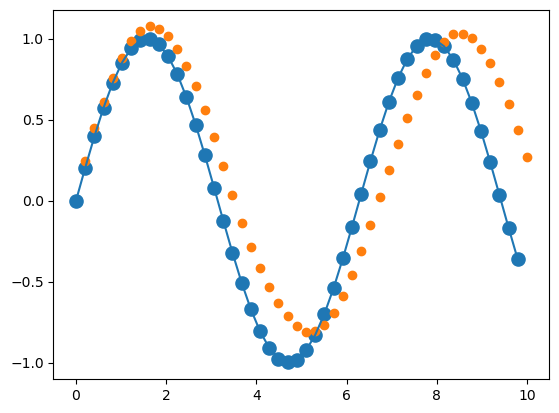

In [33]:
# 绘图
x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1], x, s=90)
plt.plot(time_steps[:-1], x.ravel())

plt.scatter(time_steps[1:], predictions)
plt.show()

## 5. RNN面临的问题

### 5.1 Gradient Vanishing and Gradient Exploding 梯度消失和梯度爆炸

The gradient vanishing and gradient explosion are the two main problems of RNN. The gradient vanishing means that the gradient of the loss function with respect to the parameters of the RNN cell is too small, which makes the parameters of the RNN cell difficult to update. The gradient explosion means that the gradient of the loss function with respect to the parameters of the RNN cell is too large, which makes the parameters of the RNN cell update too much, leading to the divergence of the model.

梯度消失和梯度爆炸是RNN面临的两个主要问题。梯度消失意味着损失函数对RNN cell的参数的梯度太小，使得RNN cell的参数难以更新。梯度爆炸意味着损失函数对RNN cell的参数的梯度太大，使得RNN cell的参数更新过多，导致模型发散。

#### 5.1.1**梯度爆炸 Gradient Explode**

解决方式： Gradient clipping

设置一个阈值，当梯度的绝对值大于这个阈值时，将梯度的绝对值设置为这个阈值。这样可以避免梯度爆炸。

例如，设置阈值为5，当梯度的绝对值大于5时，将$g$除以其模再乘以threshold，这样就可以在保留梯度方向不变的前提下，将其模的大小限制在5以内。



In [ ]:
# Gradient Clipping

loss = criterion(output, y)
model.zero_grad()
loss.backward()
for p in model.parameters():
    print(p.grad.norm())
    nn.utils.clip_grad_norm_(p, 10)
    print(p.grad.norm())
optimizer.step()


#### 5.1.2**梯度弥散（消失）Gradient Vanishing**

解决方式： [LSTM](LSTM.ipynb), GRU
